In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import pandas.io.sql as sql

In [3]:
import pymysql
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [20]:
conn=pymysql.connect(user='root',password='siyi01',database='dzdp',charset='utf8')

In [19]:
conn.close()

In [21]:
data=sql.read_sql('select a.shop,b.area,a.addr,a.category,a.review_num,a.mean_price,a.taste,a.env,a.serve from\
                  food_chengdu a inner join foodurl_chengdu b on a.url_id=b.url_id',conn)

In [22]:
data.replace(0,np.nan,inplace=True)
data.columns

Index(['shop', 'area', 'addr', 'category', 'review_num', 'mean_price', 'taste',
       'env', 'serve'],
      dtype='object')

In [23]:
hot_shops=data.dropna()
cool_shops=data.ix[data.index.difference(hot_shops.index)]

In [24]:
len(hot_shops),len(cool_shops),len(data)
#大写的尴尬...

(24020, 78602, 102622)

In [25]:
len(np.unique(data.area))  #总共19个区县

19

In [10]:
len(np.unique(data.category))   #总共20个分类

20

In [18]:
#人均最贵的餐厅...评价欠佳噢...这个不推荐..
max_mean_price=hot_shops[hot_shops.mean_price==max(hot_shops.mean_price)]
max_mean_price

,shop,area,addr,category,review_num,mean_price,taste,env,serve
30358,格阁花园,金牛区,蜀汉路一品天下大街同和路9号附1号,西餐,29,2090,5.8,5.8,5.9


In [14]:
#味道最好的餐厅..竟然是串串香...这个必吃!  ... 口味最好...怎么能只有一家呢,起码10家啊
best_taste=hot_shops[hot_shops.taste==max(hot_shops.taste)]
best_taste

,shop,area,addr,category,review_num,mean_price,taste,env,serve
36337,老街小牛•锑锅麻辣烫,金牛区,百寿路12号附2号,串串香,100,52,9.3,9.3,9.3


In [22]:
#...吃货,请查收福利~
top10_taste=hot_shops.sort_values('taste',ascending=False)[:10]
top10_taste

,shop,area,addr,category,review_num,mean_price,taste,env,serve
36337,老街小牛•锑锅麻辣烫,金牛区,百寿路12号附2号,串串香,100,52,9.3,9.3,9.3
84544,庶民居中餐馆(花土店),温江区,共和路18号,川菜,149,48,9.2,9.2,9.2
14533,油花·烧肉,武侯区,锦绣路1号附45号保利中心A座,日本料理,342,153,9.2,9.2,9.2
19508,兰亭金汤(银滩金汤),武侯区,高新区天府大道锦晖东街200号圣帝雅酒店2楼,火锅,872,109,9.2,9.2,9.2
50507,乐山王屠户跷脚牛肉,双流区,安公路二段356-358号,火锅,1046,43,9.2,8.7,9.1
32460,红盛渝味老火锅,金牛区,抚琴营通街139号,火锅,117,62,9.2,8.7,9.1
1007,丑二哥-私厨,锦江区,大慈寺路3号朗御行政公寓楼2单元19楼1号,私房菜,128,160,9.2,9.4,9.4
2578,等风来主题餐厅,锦江区,东大街芷泉段88号时代尊邸6号楼,私房菜,77,234,9.2,9.3,9.3
3910,蜂房f.fan秘社(高空餐饮酒吧),锦江区,大慈寺3号朗御2单元2906,私房菜,191,92,9.2,9.2,9.1
1848,子食至味私房菜,锦江区,兰桂坊水井街时代豪庭2期8栋,私房菜,95,206,9.2,9.2,9.2


In [31]:
#9.2分的餐厅看来有点多噢,为了公平起见,你懂的
top_taste=hot_shops[(hot_shops.taste==9.3) | (hot_shops.taste==9.2)].sort_values(['taste','env','serve']\
                                                                                 ,ascending=False)
top_taste

,shop,area,addr,category,review_num,mean_price,taste,env,serve
36337,老街小牛•锑锅麻辣烫,金牛区,百寿路12号附2号,串串香,100,52,9.3,9.3,9.3
1007,丑二哥-私厨,锦江区,大慈寺路3号朗御行政公寓楼2单元19楼1号,私房菜,128,160,9.2,9.4,9.4
25976,留园渝派火锅,青羊区,同盛路12号,火锅,146,78,9.2,9.4,9.2
14523,大福寿司,武侯区,人民南路四段11-附27号,日本料理,59,116,9.2,9.3,9.4
2578,等风来主题餐厅,锦江区,东大街芷泉段88号时代尊邸6号楼,私房菜,77,234,9.2,9.3,9.3
27715,一个勺子新疆主题私房菜,青羊区,长顺下街红墙巷49号,私房菜,239,87,9.2,9.3,9.3
1848,子食至味私房菜,锦江区,兰桂坊水井街时代豪庭2期8栋,私房菜,95,206,9.2,9.2,9.2
14533,油花·烧肉,武侯区,锦绣路1号附45号保利中心A座,日本料理,342,153,9.2,9.2,9.2
19508,兰亭金汤(银滩金汤),武侯区,高新区天府大道锦晖东街200号圣帝雅酒店2楼,火锅,872,109,9.2,9.2,9.2
84544,庶民居中餐馆(花土店),温江区,共和路18号,川菜,149,48,9.2,9.2,9.2


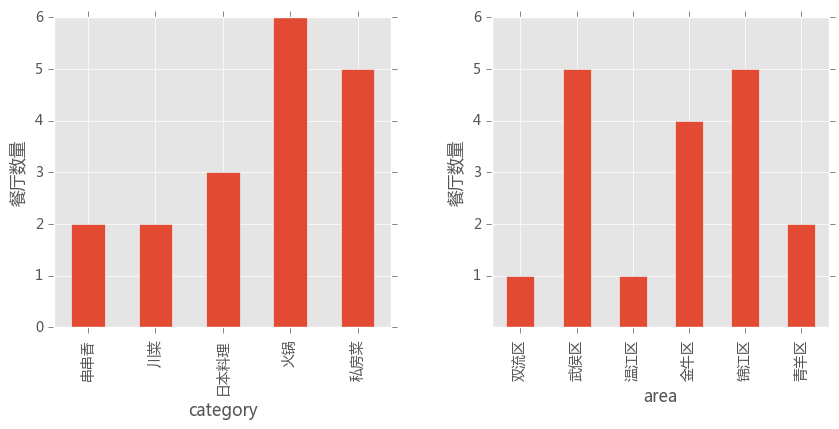

In [51]:
#来个图表吧   口味最好的餐厅类别和地区的柱状图
fig,axes=plt.subplots(1,2,figsize=(10,4),subplot_kw={'ylabel':'餐厅数量'})
fig.subplots_adjust(wspace=0.3)
top_taste.groupby('category')['shop'].count().plot(kind='bar',ax=axes[0])
top_taste.groupby('area')['shop'].count().plot(kind='bar',ax=axes[1],yticks=np.arange(1,7))

In [52]:
#这样就很明显啦~
#口味最好的餐厅集中在火锅和私房菜,日本料理依然不容小觑..而口味最好的餐厅主要分布于武侯区,金牛区和锦江区~

In [15]:
#环境最好的餐厅
best_env=hot_shops[hot_shops.env==max(hot_shops.env)]
best_env

,shop,area,addr,category,review_num,mean_price,taste,env,serve
1007,丑二哥-私厨,锦江区,大慈寺路3号朗御行政公寓楼2单元19楼1号,私房菜,128,160,9.2,9.4,9.4
21042,华道钰善阁,武侯区,盛邦街88号16栋1-8号楼,其他,98,231,8.8,9.4,9.2
25976,留园渝派火锅,青羊区,同盛路12号,火锅,146,78,9.2,9.4,9.2


In [20]:
#-----竟然不是西餐,他国料理? 那我们来看看前10名吧. 
top10_env=hot_shops.sort_values('env',ascending=False)[:10]
top10_envz

,shop,area,addr,category,review_num,mean_price,taste,env,serve
25976,留园渝派火锅,青羊区,同盛路12号,火锅,146,78,9.2,9.4,9.2
1007,丑二哥-私厨,锦江区,大慈寺路3号朗御行政公寓楼2单元19楼1号,私房菜,128,160,9.2,9.4,9.4
21042,华道钰善阁,武侯区,盛邦街88号16栋1-8号楼,其他,98,231,8.8,9.4,9.2
19924,老房子元年食府•华粹元年,武侯区,天府三街大源中央公园南区商业部分,川菜,172,188,8.9,9.3,9.0
27715,一个勺子新疆主题私房菜,青羊区,长顺下街红墙巷49号,私房菜,239,87,9.2,9.3,9.3
22881,仁和春天酒店·春天庭餐厅(二环路西二段店),青羊区,二环路西二段19号仁和春天酒店3楼,西餐,704,193,9.0,9.3,9.2
14200,梵景火锅,武侯区,长荣路56号泛悦国际步行街2号楼3楼,火锅,42,112,8.2,9.3,8.9
2578,等风来主题餐厅,锦江区,东大街芷泉段88号时代尊邸6号楼,私房菜,77,234,9.2,9.3,9.3
21412,小龙翻大江火锅酒楼(旗舰店),青羊区,窄巷子28号,火锅,4383,113,9.1,9.3,9.1
80998,龙腾庭院火锅(恒大新城店),温江区,凤翔大道光华8线,火锅,305,75,8.5,9.3,7.9


In [54]:
#嗯...有一家上榜了~~小情侣们可以开启预定了(当然啦,这10家也要吃个遍咯~~女朋友是不会放过你们的...)
#火锅和私房菜数量依然占据大头..我要说的是火锅,,还能把环境做到这么好,这是需要点能耐的..
#接下来就看服务最好的餐厅吧~

In [53]:
#不解释啦,这3类已经出现多次~
best_serve=hot_shops[hot_shops.serve==max(hot_shops.serve)]
best_serve

,shop,area,addr,category,review_num,mean_price,taste,env,serve
1007,丑二哥-私厨,锦江区,大慈寺路3号朗御行政公寓楼2单元19楼1号,私房菜,128,160,9.2,9.4,9.4
14523,大福寿司,武侯区,人民南路四段11-附27号,日本料理,59,116,9.2,9.3,9.4
41279,海底捞火锅(龙湖三千集店),成华区,建设北路三段2号龙湖三千集3层,火锅,591,105,8.8,9.2,9.4


In [55]:
#最火的餐厅（按评论数最多计）...不用说,这个也是情理之中啦.
max_review_num=hot_shops[hot_shops.review_num==max(hot_shops.review_num)]
max_review_num

,shop,area,addr,category,review_num,mean_price,taste,env,serve
445,四海一家(人民南路二段店),锦江区,人民南路二段1号仁恒置地广场购物中心5层,自助餐,10142,164,7.5,8.2,7.6


In [56]:
#接下来看总体情况吧~hot_shops

In [91]:
#按分类统计分析
grouped_category_hot=hot_shops.groupby('category')['shop','review_num','mean_price','taste','env','serve']
mapping={'shop':'count','review_num':'mean','mean_price':'mean','taste':'mean','env':'mean','serve':'mean'}
groupby_category_hot=grouped_category_hot.agg(mapping)
groupby_category_cool=DataFrame(cool_shops.groupby('category')['shop'].count())

In [101]:
by_category=groupby_category_hot.merge(groupby_category_cool,left_index=True,right_index=True,
                                                    how='outer')
by_category.fillna(0,inplace=True)
by_category.columns=['hot_shop','review_num','serve','env','taste','mean_price','cool_shop']
by_category['cool_pct']=by_category.cool_shop/(by_category.hot_shop+by_category.cool_shop)
columns=['hot_shop','review_num','mean_price','taste','env','serve','cool_shop','cool_pct']
by_category=by_category[columns]
by_category

,hot_shop,review_num,mean_price,taste,env,serve,cool_shop,cool_pct
category,,,,,,,,
东南亚菜,72.0,566.361111,99.861111,7.766667,8.093056,7.947222,46,0.389831
串串香,1343.0,61.479523,41.483246,7.342815,7.171109,7.297617,2275,0.628800
其他,1017.0,138.367748,44.874140,7.255654,7.254572,7.239725,10636,0.912726
咖啡厅,918.0,69.552288,38.971678,7.259913,7.389107,7.335294,1847,0.667993
小吃快餐,6744.0,48.074881,21.025504,7.142052,7.040273,7.087767,26705,0.798380
川菜,3563.0,105.030873,50.929273,7.227477,7.192254,7.161128,8354,0.701015
新疆菜,37.0,111.891892,33.135135,7.267568,7.035135,7.102703,140,0.790960
日本料理,507.0,260.883629,69.954635,7.644970,7.728994,7.789152,391,0.435412
海鲜,277.0,125.981949,69.169675,7.300000,7.238628,7.245487,854,0.755084


In [104]:
#我要说说这7213家茶馆...据说成都的茶馆数量全国居首,这样的成绩,实在说不过去..
teahouse=data[data.category=='茶馆'].count()
teahouse

shop          7213
area          7213
addr          7213
category      7213
review_num    1813
mean_price     112
taste            0
env              0
serve            0
dtype: int64

In [134]:
#噢,竟然没有一家的数据是齐全的..还好有1813家是有人光顾的,不过,只有112家有人点评了价格...
#看来茶馆在网上很少有人关注,难道都是线下口口相传么?
#暂时剔除,待细分研究
#酒吧的情况也值得我们一窥究竟:
bar=data[data.category=='酒吧'].count()
bar

shop          352
area          352
addr          352
category      352
review_num    121
mean_price     17
taste           1
env             1
serve           1
dtype: int64

In [136]:
#看来成都人对酒吧缺少热爱噢(待分析完上海来确认一下)
#同样剔除
by_category=by_category[by_category.hot_shop>1]

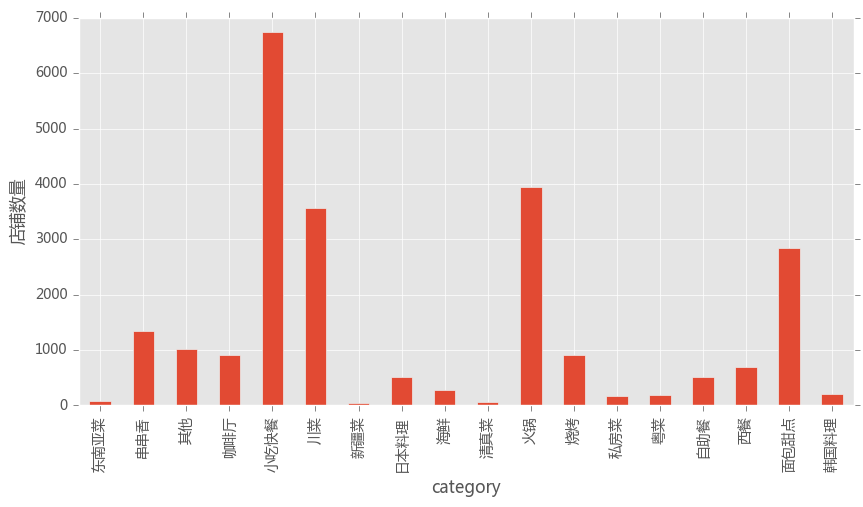

In [137]:
#分类分析:
#hot_shop分类情况:
by_category.hot_shop.plot(kind='bar',figsize=(10,5)).set_ylabel('店铺数量')

In [114]:
#小吃快餐数量接近7000家,瑶瑶领先...不过,似乎小一点儿的店铺都能叫"小吃快餐",不足为奇
#川菜和火锅不用说了,大本营...面包和甜点倒是有些出乎我的意料了,看来这个分类里包含奶茶了:
#不过,这个数量应该远远不止,奶茶店的名字实在不好捉摸...

In [133]:
sum([1 for shop in hot_shops.shop.values if (('奶茶'in shop) | ('茶饮' in shop) | ('快乐柠檬' in shop))])

162

In [138]:
#另外我们也注意到东南亚菜,新疆菜,清真菜数量很少,在100家以下.

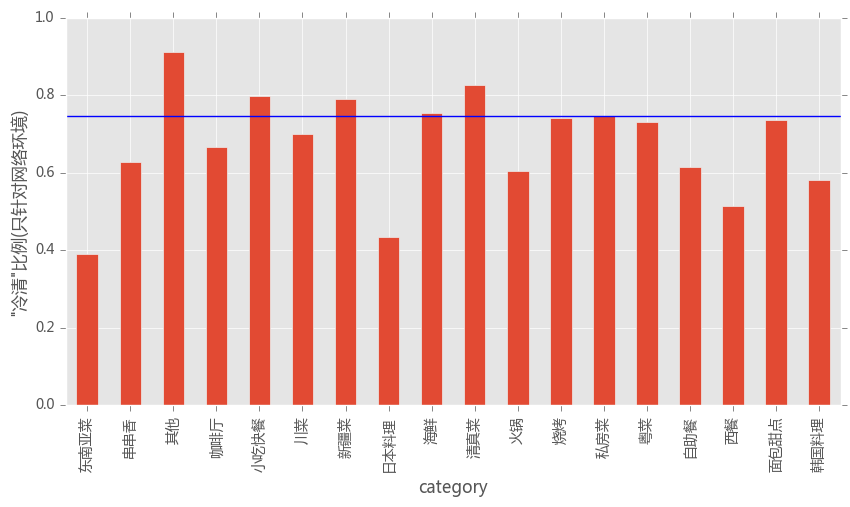

In [144]:
#各类店铺"冷清"比例[只是针对网络环境上的冷清,无线下数据..]:
by_category.cool_pct.plot(kind='bar',figsize=(10,5)).set_ylabel('"冷清"比例 (只针对网络环境)')
plt.axhline(y=by_category.cool_shop.sum()/(by_category.hot_shop.sum()+by_category.cool_shop.sum()))

In [143]:
#"冷清"店铺总体比例:
by_category.cool_shop.sum()/(by_category.hot_shop.sum()+by_category.cool_shop.sum())

0.74734151651888547

In [62]:
#网络上"冷清"店铺总体比例达到74.7%,可见目前3/4的店铺还是较少依赖网络流量...当然,也能反映出这些店铺相对光顾人数较少,
#长期处于"无需预约"状态.其中,又以小吃快餐,新疆菜和清真菜更为突出,冷清比例在80%左右,虽然新疆菜菜和清真菜数量较少.可见新疆菜和清真菜
#在成都受欢迎程度较低.而东南亚菜和日本料理在网络环境上相对比较火爆,特别是东南亚菜,"冷清"比例低于40%. 加之店铺数量不多,可见还有一
#定发展空间.接下来看平均评论数,也对以上结论做个验证

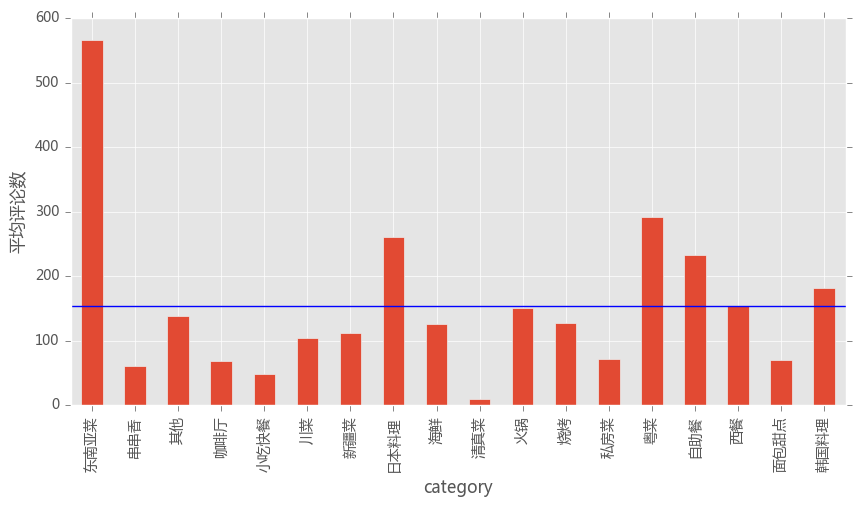

In [145]:
#各类店铺平均评论数情况:
by_category.review_num.plot.bar(figsize=(10,5)).set_ylabel('平均评论数')
plt.axhline(y=by_category.review_num.mean())

In [148]:
#平均评论数:
by_category.review_num.mean()

154.43480722009224

In [152]:
#东南亚菜完美胜出...其次是粤菜及日本料理...自助餐当然是情理之中~..垫底的清真菜,那就用"门可罗雀"来形容吧..

53.87527630015768

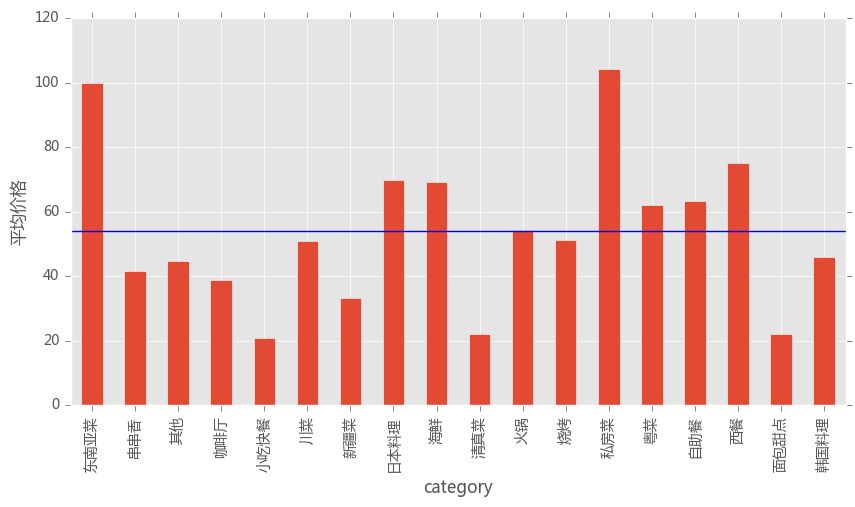

In [159]:
#价格水平:
by_category.mean_price.plot.bar(figsize=(10,5)).set_ylabel('平均价格')
plt.axhline(y=by_category.mean_price.mean())
by_category.mean_price.mean()

In [154]:
#最高的3类,私房菜,东南亚菜和西餐;最低的3类:小吃快餐,清真菜和面包甜点

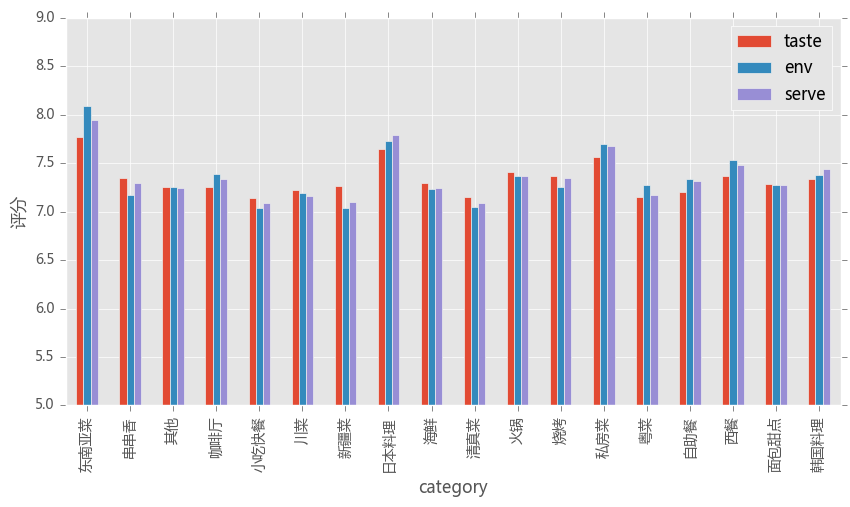

In [157]:
#口味,环境和服务:
by_category[['taste','env','serve']].plot.bar(figsize=(10,5),ylim=[5,9]).set_ylabel('评分')

In [ ]:
#评分总体上差别不大,但是东南亚菜,日本料理及私房菜得分有一定优势

In [149]:
#总结:
#清真菜:店铺数量较少,"冷清"比例较高,人均评论数远低于平均水平,人均价格低于平均水平50%以上,评价普通,不具有优势..在成都不受欢迎,新开店铺
#需避免
#小吃快餐,面包甜点:店铺数量较多,"冷清"比例与平均水平相当,人均评论数为平均水平50%左右,人均价格为平均水平50%左右,总体评价普通,不占优势..
#此两类店铺在成都过于饱和,竞争较大,新开店铺需避免;另外需注意川菜也无优势...联想到现在的外卖市场空间,此类店铺应积极转型,抢占外卖市场
#私房菜:店铺数量较少,"冷清"比例与平均水平相当,人均评论数为平均水平50%左右,人均价格为平均水平2倍,总体评价较好,有价格优势,但是不占市场优势
#粤菜:店铺数量较少,"冷清"比例与平均水平相当,人均评论数为平均水平2倍左右,人均价格与平均水平相当,总体评价普通..可见,粤菜分化较大,若有较好
#的技术水平,市场空间还有有的...不过,话又说回来,在哪个领域又不是这样呢..
#火锅:数量较多,其余指标均处于平均水平..可见火锅在成都最受欢迎,存活率最好,但是市场已接近饱和..
#日本料理:店铺数量不多,"冷清"比例较低,人均评论数高于平均水平68.8%,人均价格超过平均水平30%%,评价得分较好..有一定优势,,而且特色明显,
#新开店铺可以推荐
#东南亚菜:店铺数量较少,"冷清"比例最低,人均评论数为平均水平的3.66倍,人均价格超过平均水平85%,评价得分最好..可见东南亚菜在成都很火爆,
#优势明显,在有较大市场空间和价格空间..新开店铺应强烈推荐

In [162]:
#评价的相关系数分析:
corr_data=by_category[['mean_price','taste','env','serve']]
corr_data.corr()

,mean_price,taste,env,serve
mean_price,1.000000,0.728820,0.826655,0.779465
taste,0.728820,1.000000,0.893735,0.951991
env,0.826655,0.893735,1.000000,0.969883
serve,0.779465,0.951991,0.969883,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd96b5898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd8ce9278>]], dtype=object)

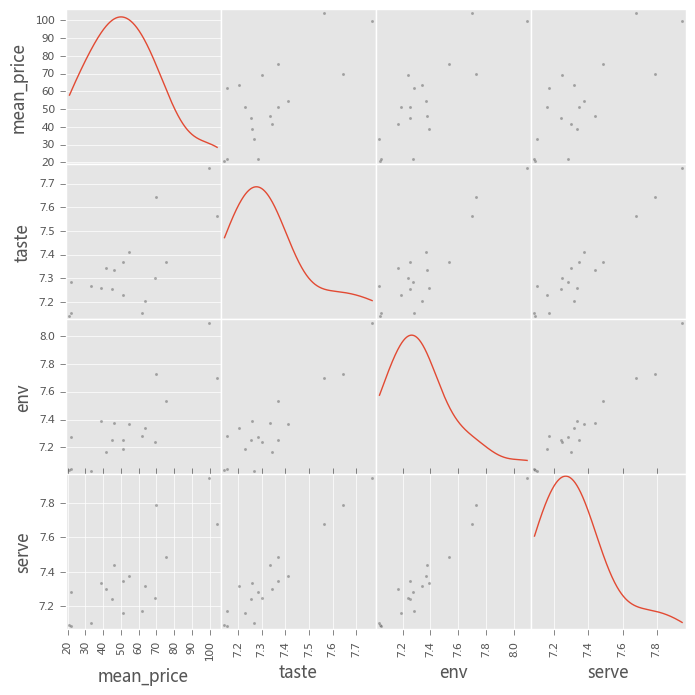

In [170]:
pd.scatter_matrix(corr_data,alpha=0.3,figsize=(8,8),diagonal='kde',c='k')

In [171]:
#从分类的平均消费和平均得分来看,人均消费和口味的相关系数为0.729,与服务的相关系数为0.78,与环境的相关系数为0.827,可见人均消费在整体上与
#口味,服务和环境存在较强的正相关关系,这也与我们的生活情况相匹配.
#而味道与环境和服务的相关系数均达到了0.9及以上,可见味道和环境及服务高度相关.味道不错的餐厅环境和服务也相对较好,而环境和服务相对较好的餐厅
#味道也不差...似乎..味道好坏和消费者的心情是高度相关的~环境好,服务好,消费者对味道反而就不那么敏感了吧~

In [35]:
#分区域分析:
grouped_area_hot=hot_shops.groupby('area')['shop','review_num','mean_price','taste','env','serve']
mapping={'shop':'count','review_num':'mean','mean_price':'mean','taste':'mean','env':'mean','serve':'mean'}
groupby_area_hot=grouped_area_hot.agg(mapping)
groupby_area_cool=DataFrame(cool_shops.groupby('area')['shop'].count())

In [43]:
#成都市各区县人口(2014年底,单位为十万)
papulation_chengdu=DataFrame(pd.read_table('papulation_chengdu.txt',delimiter=' ',header=None,index_col=0,
                                           skiprows=1)[4])
papulation_chengdu=papulation_chengdu/100000

In [44]:
by_area=pd.merge(groupby_area_hot,groupby_area_cool,how='outer',left_index=True,right_index=True).merge(\
        papulation_chengdu,how='inner',left_index=True,right_index=True)

In [45]:
by_area.columns=['hot_shop','review_num','serve','env','taste','mean_price','cool_shop','papulation']
by_area['cool_pct']=by_area.cool_shop/(by_area.hot_shop+by_area.cool_shop)
by_area['hot_density']=by_area.hot_shop/by_area.papulation
by_area['cool_density']=by_area.cool_shop/by_area.papulation

In [46]:
columns=['hot_shop','review_num','mean_price','taste','env','serve',
         'cool_shop','cool_pct','hot_density','cool_density']
by_area=by_area[columns]
by_area

,hot_shop,review_num,mean_price,taste,env,serve,cool_shop,cool_pct,hot_density,cool_density
锦江区,7.327284,45.831481,7.341265,7.358395,194.154321,3240,4357,0.998321,1.486593,883.968261
青羊区,7.243738,41.028169,7.265284,7.301751,120.060525,2627,5014,0.998557,1.131032,782.882143
金牛区,7.199915,38.973651,7.231619,7.270888,104.024649,2353,5268,0.998635,0.955123,698.839645
武侯区,7.343341,45.786840,7.345035,7.361604,155.955674,5076,8534,0.999140,0.699247,812.624146
成华区,7.211180,36.155486,7.251222,7.290224,117.567343,1923,3747,0.998079,1.018877,529.418247
龙泉驿区,7.159449,37.122047,7.168110,7.198228,24.025591,508,1601,0.995548,1.132842,253.326793
青白江区,7.123936,36.132979,7.123936,7.150532,12.941489,188,2160,0.996713,1.709456,518.312509
新都区,7.192136,36.008502,7.190542,7.209564,17.941552,941,6297,0.998859,1.000819,876.256740
温江区,7.183988,34.115914,7.207171,7.223477,34.371316,1018,5137,0.998603,1.778778,1271.937644
金堂县,7.131076,31.677291,7.127490,7.135857,10.159363,251,2447,0.997094,0.797811,273.765705
